## Importing and prepping data

In [1]:
import pandas as pd
import diff_classifier.aws as aws
import diff_classifier.pca as pca

In [2]:
filename = 'features_test_01.csv'
folder = 'test_files'
aws.download_s3('{}/{}'.format(folder, filename), filename, bucket_name='nancelab.publicfiles')

In [3]:
fstats = pd.read_csv(filename, encoding = "ISO-8859-1", index_col='Unnamed: 0')
nonnum = []
fstats_num = fstats.drop(nonnum, axis=1)
fstats_raw = fstats.as_matrix()
#fstats

## PCA analysis

The pca.pca_analysis function provides a completely contained PCA analysis of the input trajectory features dataset. It includes options to impute NaN values (fill in with average values or drop them), and to scale features. Read the docstring for more information. 

In [6]:
pcadataset = pca.pca_analysis(fstats, dropcols=nonnum, n_components=6)

Cumulative explained variance:
0 component: 0.35921335748525884
1 component: 0.485939746589979
2 component: 0.6087050606421144
3 component: 0.7143531641538526
4 component: 0.7981959078103225
5 component: 0.8607813102843351


The pca.kmo function calculates the Kaiser-Meyer-Olkin statistic, a measure of sampling adequacy. Check the docstring for more information.

In [8]:
kmostat = pca.kmo(pcadataset.scaled)

0.943652133886


## Visualization

Users can then compare average principle component values between subgroups of the data. In this case, all particles were taken from the same sample, so there are no experimental subgroups. I chose to compare short trajectories to long trajectories, as I would expect differences between the two groups.

In [18]:
import numpy as np
test = np.exp(np.nanmean(np.log(pcadataset.final[pcadataset.final['frames']>100].as_matrix()), axis=0))[-6:]
test1 = np.exp(np.nanmean(np.log(pcadataset.final[pcadataset.final['frames']<100].as_matrix()), axis=0))[-6:]

/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ubuntu/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until


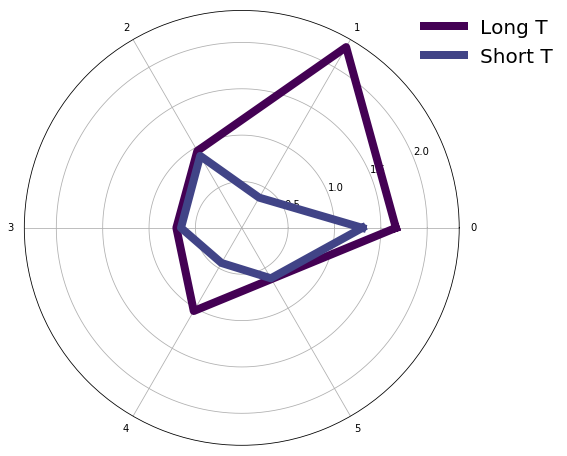

In [19]:
dicti = {}
dicti[0] = test
dicti[1] = test1

pca.plot_pca(dicti, savefig=True, labels=['Long T', 'Short T'])

The variable pcadataset.prcomps shows the user the major contributions to each of the new principle components. When observing the graph above, users can see that there are some differences between short trajectories and long trajectories in component 0 (asymmetry1 being the major contributor) and component 1 (elongation being the major contributor).

In [14]:
pcadataset.prcomps

,0,1,2,3,4,5
0,asymmetry1,elongation,D_fit,AR,AR,MSD_ratio
1,alpha,fractal_dim,Track_ID,X,asymmetry2,Track_ID
2,Y,kurtosis,MSD_ratio,asymmetry3,kurtosis,asymmetry2
3,boundedness,asymmetry2,AR,Y,efficiency,kurtosis
4,efficiency,frames,X,alpha,fractal_dim,AR
